## Homework 06: Optimization in Python

## Due Date: Apr 06, 2020, 08:00am

#### Firstname Lastname: Yunya Wang

#### E-mail: yw4509@nyu.edu

#### Enter your solutions and submit this notebook

---

**Problem 1 (30p)**

We examine a product of non-negative numbers given their sum. Concretely, the problem is to find all $(x, y, z)$ among all non-negative reals $x, y, z \geq 0$ such that
their product $P(x, y, z) = x y z$ is maximized, given their sum $x + y + z = 300$. 


1.1. (15p)
Cast and solve the problem as a non-constrained optimization problem;
use "scipy.optimize.minimize" with method='BFGS'

1.2. (15p)
Cast and solve the problem as a constrained optimization problem;
use "scipy.optimize.minimize" with method='L-BFGS-B'


**Hint**
There are three variables. Use that the sum is given, and analogous ideas from "Minimizing the area of a cylinder with unit volume" presented in the Lecture, to obtain the objective function of one variable.

1.1. The problem is unconstrained. 

1.2. The problem is constrained. Define a proper bound of the input variable. 



### 1.1

In [238]:
import scipy.optimize as optimize
import sympy
import numpy as np
import matplotlib.pyplot as plt
#for best printing 
sympy.init_printing()

In [239]:
def obj1(X):
    y=X[0]
    z=X[1]
    return -y*z*(-y-z+300)
#we want to max xyz => min -xyz

In [240]:
X0=[100,100,100]
sol_1=optimize.minimize(obj1,X0,method='BFGS').x
print('X:',sol_1[0],'Y:',sol_1[1],'Z:',sol_1[2])

X: 100.0 Y: 100.0 Z: 100.0


### 1.2

In [119]:
#we add additinal constraints for part 2
bnd_y=(0,300)
bnd_z=(0,300)

sol_2=optimize.minimize(obj1_const,
                        [50,50],
                        method='L-BFGS-B', 
                        bounds=[bnd_y,bnd_z]).x
sol_2

array([99.99993949, 99.99993949])

In [120]:
x = 300 - sol_2[0]-sol_2[1]
print('X:',x,'Y:',sol_2[0],'Z:',sol_2[1])

X: 100.00012102184229 Y: 99.99993948907886 Z: 99.99993948907886


---

**Problem 2 (70p)**

Let us consider the following function,

$$h(x, y) := (x^2 + y - 10)^2 + (x + y^2 - 16)^2$$.
    
find **all extremal** points (both minima and maxima) in the region $-10 \leq x, y \leq 10$.


The goal is to: (a) find extremal points; (b) compare convergence, i.e. the numbers of: Iterations, Function evaluations, Gradient evaluations, Hessian evaluations.


Solve the problem by using the Newton optimization routine "scipy.optimize.fmin_ncg":

2.1. (20p) providing gradient (fprime) and Hessian (fhess) in "scipy.optimize.fmin_ncg"

2.2. (20p) providing only gradient (fprime) in "scipy.optimize.fmin_ncg"

Solve the problem by using the quasi-Newton optimization routine "fmin_bfgs":

2.3. (20p) **not** providing gradient (fprime) or Hessian (like in "scipy.optimize.fmin_ncg").

You can use fmin_bfgs in question 2.3 instead of fmin_ncg. However gradient (fprime) or hessian should not be provided.



To calculate the gradient and Hessian use **sympy.diff** analogously to the computation from the Lecture notes (make sure the gradient and Hessian are correctly computed).


2.4. (10p) Plot $h(x, y)$ in the given region $-10 \leq x, y \leq 10$.


**Hint**: Note there are **5** extremal points in the given region. So one has to run the Newton routine with different starting points in order to find different extremal points. 


For every extremal point reprot: 
- (xopt, yopt)
- h(xopt, yopt)
- (xstart, ystart)
- the number of Iterations
- the number of Function evaluations
- the number of Gradient evaluations
- the number of Hessian evaluations.

**Hint 2:** There are 4 local mimima and 1 maximum; notice that "scipy.optimize.fmin_ncg" finds "minimum" not the "maximum". To locate the minima partition $-10 \leq x, y \leq 10$ into 4 regions and use "optimize.brute" in each of these regions. Then use these 4 points as starting points in "scipy.optimize.fmin_ncg" -- as in the Lecture.


### 2.1

In [148]:
def func_to_vector(f):
    """
    Wrapper for f(X) -> f(X[0], X[1])
    """
    return lambda x: np.array(f(x[0], x[1]))

In [247]:
x, y = sympy.symbols("x, y")
f_sym = (x**2 + y+ -10)**2 + (x + y**2 -16)**2
print(f_sym)

(x + y**2 - 16)**2 + (x**2 + y - 10)**2


In [145]:
fprime_sym = [f_sym.diff(x_) for x_ in (x, y)]
print(fprime_sym)

[4*x*(x**2 + y - 10) + 2*x + 2*y**2 - 32, 2*x**2 + 4*y*(x + y**2 - 16) + 2*y - 20]


In [146]:
fhessian_sym = [[f_sym.diff(u, v) for u in (x, y)] for v in (x, y)]
print(fhessian_sym)

[[2*(6*x**2 + 2*y - 19), 4*(x + y)], [4*(x + y), 2*(2*x + 6*y**2 - 31)]]


In [290]:
f_lambda = sympy.lambdify((x, y), f_sym, 'numpy')
fprime_lambda = sympy.lambdify((x, y), fprime_sym, 'numpy')
fhessian_lambda = sympy.lambdify((x, y), fhessian_sym, 'numpy')

f = func_to_vector(f_lambda)
fprime = func_to_vector(fprime_lambda)
fhess = func_to_vector(fhessian_lambda)

## For the maxima:

In [282]:
f_sym_max = -f_sym
fprime_sym_max = [f_sym_max.diff(x_) for x_ in (x, y)]
fhessian_sym_max = [[f_sym_max.diff(u, v) for u in (x, y)] for v in (x, y)]

f_lambda_max = sympy.lambdify((x, y), f_sym_max, 'numpy')
fprime_lambda_max = sympy.lambdify((x, y), fprime_sym_max, 'numpy')
fhessian_lambda_max = sympy.lambdify((x, y), fhessian_sym_max, 'numpy')

f_max = func_to_vector(f_lambda_max)
fprime_max = func_to_vector(fprime_lambda_max)
fhess_max = func_to_vector(fhessian_lambda_max)

print(f_sym_max)
print(fprime_sym_max)
print(fhessian_sym_max)

-(x + y**2 - 16)**2 - (x**2 + y - 10)**2
[-4*x*(x**2 + y - 10) - 2*x - 2*y**2 + 32, -2*x**2 - 4*y*(x + y**2 - 16) - 2*y + 20]
[[2*(-6*x**2 - 2*y + 19), -4*(x + y)], [-4*(x + y), 2*(-2*x - 6*y**2 + 31)]]


### 2.2

In [334]:
x_start_1 = optimize.brute(f, 
                           (slice(-10, 0, 0.5), slice(-10,0, 0.5))) 
x_start_1

array([-3.8013269 , -4.44984144])

In [335]:
x_start_2 = optimize.brute(f, 
                           (slice(0, 10, 0.5), slice(0,10, 0.5))) 
x_start_2

array([2.51548382, 3.67210702])

In [336]:
x_start_3 = optimize.brute(f, 
                           (slice(0, 10, 0.5), slice(-10,0, 0.5))) 
x_start_3

array([ 3.67566063, -3.51057275])

In [337]:
x_start_4 = optimize.brute(f, 
                           (slice(-10, 0, 0.5), slice(0,10, 0.5))) 
x_start_4

array([-2.38986779,  4.28834369])

In [338]:
x_opt_1 = optimize.fmin_ncg(f, x_start_1, fprime=fprime)
x_opt_2 = optimize.fmin_ncg(f, x_start_2, fprime=fprime)
x_opt_3 = optimize.fmin_ncg(f, x_start_3, fprime=fprime)
x_opt_4 = optimize.fmin_ncg(f, x_start_4, fprime=fprime)

print('local minima:\n',x_opt_1,'\n',x_opt_2,'\n',x_opt_3,'\n',x_opt_4)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 12
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 14
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 10
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 14
         Hessian evaluations: 0
local minima:
 [-3.80129779 -4.44986492] 
 [2.51552759 3.67212097] 
 [ 3.67567701 -3.51060151] 
 [-2.3899068   4.28834546]


In [339]:
x_opt_5 = optimize.fmin_ncg(f_max, [-2.5,-3], 
                             fprime= fprime_max)
print('local max:\n',x_opt_5)

         Current function value: -372.650768
         Iterations: 6
         Function evaluations: 24
         Gradient evaluations: 40
         Hessian evaluations: 0
local max:
 [-0.88439884 -0.28267789]


### 2.3

In [340]:
x_opt_1 = optimize.fmin_bfgs(f, x_start_1)
x_opt_2 = optimize.fmin_bfgs(f, x_start_2)
x_opt_3 = optimize.fmin_bfgs(f, x_start_3)
x_opt_4 = optimize.fmin_bfgs(f, x_start_4)

print('local minima:\n',x_opt_1,'\n',x_opt_2,'\n',x_opt_3,'\n',x_opt_4)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5
local minima:
 [-3.80129781 -4.44986492] 
 [2.51552757 3.67212096] 
 [ 3.675677   -3.51060151] 
 [-2.3899068   4.28834546]


In [341]:
x_opt_5_new = optimize.fmin_bfgs(f_max, [-2.5,-3])
print('local max:\n',x_opt_5_new)

Optimization terminated successfully.
         Current function value: -807014683640740396232390830194688.000000
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 16
local max:
 [ 1.65829351e+08 -8.44236392e+07]


### 2.4

In [342]:
def func_X_Y_to_XY(f, X, Y):
    """
    Wrapper for f(X, Y) -> f([X, Y])
    """
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

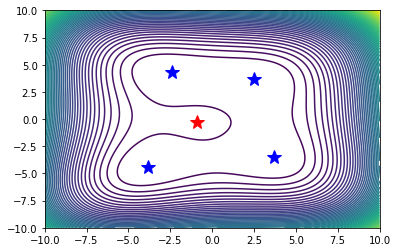

In [345]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-10, 10, 250)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 70)
ax.plot(x_opt_1[0], x_opt_1[1], 'b*', markersize=15)
ax.plot(x_opt_2[0], x_opt_2[1], 'b*', markersize=15)
ax.plot(x_opt_3[0], x_opt_3[1], 'b*', markersize=15)
ax.plot(x_opt_4[0], x_opt_4[1], 'b*', markersize=15)
ax.plot(x_opt_5[0], x_opt_5[1], 'r*', markersize=15)

### The following is zooming in to check the five points

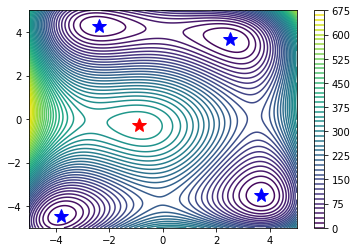

In [344]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-5, 5, 250)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)


ax.plot(x_opt_1[0], x_opt_1[1], 'b*', markersize=15)
ax.plot(x_opt_2[0], x_opt_2[1], 'b*', markersize=15)
ax.plot(x_opt_3[0], x_opt_3[1], 'b*', markersize=15)
ax.plot(x_opt_4[0], x_opt_4[1], 'b*', markersize=15)
ax.plot(x_opt_5[0], x_opt_5[1], 'r*', markersize=15)
plt.colorbar(c, ax=ax)

### Report for the extrema:

In [ ]:
For every extremal point reprot:

(xopt, yopt)
h(xopt, yopt)
(xstart, ystart)
the number of Iterations
the number of Function evaluations
the number of Gradient evaluations
the number of Hessian evaluations.

In [319]:
print(x_opt_1)
print(f(x_opt_1))
print(x_start_1)
print('Iterations: 2 \n',
         'Function evaluations: 3 \n',
         'Gradient evaluations: 12 \n',
         'Hessian evaluations: 0\n')


[-3.80129779 -4.44986492]
1.2488671607420624e-18
[-3.8013269  -4.44984144]
Iterations: 2 
 Function evaluations: 3 
 Gradient evaluations: 12 
 Hessian evaluations: 0



In [321]:
print(x_opt_2)
print(f(x_opt_2))
print(x_start_2)
print('Iterations: 2 \n',
         'Function evaluations: 3 \n',
         'Gradient evaluations: 14 \n',
         'Hessian evaluations: 0\n')

[2.51552759 3.67212097]
3.498116851004233e-18
[2.51548382 3.67210702]
Iterations: 2 
 Function evaluations: 3 
 Gradient evaluations: 12 
 Hessian evaluations: 0



In [325]:
print(x_opt_3)
print(f(x_opt_3))
print(x_start_3)
print('Iterations: 2 \n',
         'Function evaluations: 3 \n',
         'Gradient evaluations: 10 \n',
         'Hessian evaluations: 0\n')

[ 3.67567701 -3.51060151]
2.397246264985697e-18
[ 3.67566063 -3.51057275]
Iterations: 2 
 Function evaluations: 3 
 Gradient evaluations: 10 
 Hessian evaluations: 0



In [324]:
print(x_opt_4)
print(f(x_opt_4))
print(x_start_4)
print('Iterations: 2 \n',
         'Function evaluations: 3 \n',
         'Gradient evaluations: 14 \n',
         'Hessian evaluations: 0\n')

[-2.3899068   4.28834546]
2.5424947994752875e-17
[-2.38986779  4.28834369]
Iterations: 2 
 Function evaluations: 3 
 Gradient evaluations: 14 
 Hessian evaluations: 0



In [327]:
print(x_opt_5)
print(f(x_opt_5))
print(x_start_5)
print('Iterations: 6 \n',
         'Function evaluations: 24 \n',
         'Gradient evaluations: 40 \n',
         'Hessian evaluations: 0\n')

[-0.88439884 -0.28267789]
372.650768396674
[9.72092526e+44 1.80945946e+44]
Iterations: 6 
 Function evaluations: 24 
 Gradient evaluations: 40 
 Hessian evaluations: 0

